In [109]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
import pandas as pd
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import kagglehub
from sklearn.model_selection import train_test_split

In [110]:
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
train_dir = os.path.join(path, 'Training')
test_dir = os.path.join(path, 'Testing')

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.


In [111]:
# Split the data with a common 80/20 ratio for training/testing
x = train_dir[:45]
y = test_dir[:45]

print(f"Length of var1: {len(x)}")
print(f"Length of var2: {len(y)}")


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Length of var1: 45
Length of var2: 45


In [112]:
BATCH_SIZE = 64
IMG_SIZE = (128, 128) # Increased slightly for better detail

# Create datasets using the modern tf.data API
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=67,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle = True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=67,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle = True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=67,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle = False
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [113]:
model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(128, 128, 3)))

model.add(layers.Conv2D(32, (3, 3), padding='same')) # padding='same' keeps corners
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(32, (3, 3), padding='same')) # padding='same' keeps corners
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(32, (3, 3), padding='same')) # padding='same' keeps corners
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4)) # Changed to 4 output units for 4 classes

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 62, 62, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,696 (366.00 KB)

 Trainable params: 93,504 (365.25 KB)

 Non-trainable params: 192 (768.00 B)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 62, 62, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,844 (2.61 MB)

 Trainable params: 683,652 (2.61 MB)

 Non-trainable params: 192 (768.00 B)

In [114]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',        # Watch the validation loss
    patience=3,                # Stop if it doesn't improve for 3 epochs in a row
    restore_best_weights=True  # IMPORTANT: Revert to the best version, not the last version
)



In [115]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(
    train_ds,
    epochs=50,                 # Set this high (it won't actually run all 50)
    validation_data=val_ds,
    callbacks=[early_stopping] # Pass the callback here
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 152ms/step - accuracy: 0.6092 - loss: 1.1255 - val_accuracy: 0.4764 - val_loss: 1.2936
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.8308 - loss: 0.4588 - val_accuracy: 0.5674 - val_loss: 1.0663
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8710 - loss: 0.3438 - val_accuracy: 0.4081 - val_loss: 1.5115
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9238 - loss: 0.2146 - val_accuracy: 0.7478 - val_loss: 0.6335
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9218 - loss: 0.2130 - val_accuracy: 0.8503 - val_loss: 0.3999
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9542 - loss: 0.1355 - val_accuracy: 0.8765 - val_loss: 0.3663
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9580 - loss: 0.1228 - val_accuracy: 0.8441 - val_loss: 0.5071
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9676 - loss: 0.0856 - val_accuracy: 0.927

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


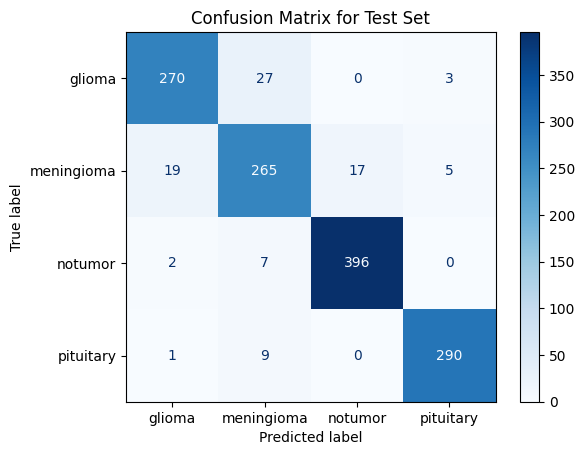

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import sklearn.metrics as metrics
import numpy as np

# Get true labels from test_ds
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())

# Get predictions from the model for test_ds
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)

# Now, create the confusion matrix using the actual test labels and the predicted labels
# Ensure y_true is a numpy array
y_true = np.array(y_true)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_ds.class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()


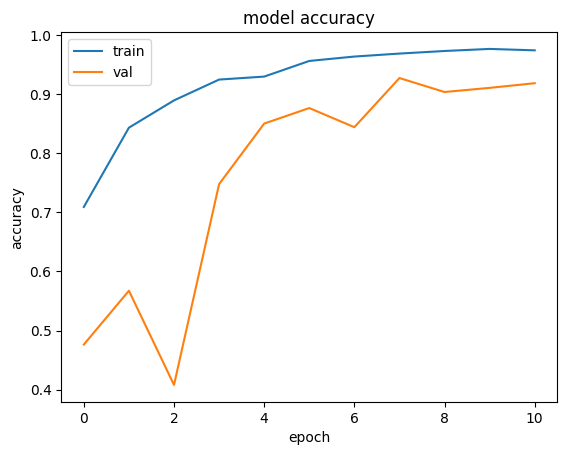

In [117]:
plt.plot(history.history['accuracy'])
# training accuracy: performance on data it was trained on
plt.plot(history.history['val_accuracy'])
# validation accuracy: how well it does on a dataset it has never seen
# better indicator for real world
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()